In [277]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import warnings, scipy.sparse as sp, matplotlib, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import rc_context
from collections import Counter
import matplotlib.font_manager
import openpyxl
import pyreadr
import rpy2
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources'
os.environ['R_USER'] = '/Library/Frameworks/R.framework/Resources'
import anndata2ri
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import magic
from scipy import sparse
from sklearn.neighbors import NearestNeighbors
#import seaborn as sns
import palantir
import loompy
#import feather
import re
#from scipy.sparse import csgraph

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rc('font', size=14)
import matplotlib.lines as lines

pd.set_option('display.max_rows', 200)

sc.set_figure_params(dpi=80, dpi_save=300, color_map='Spectral_r', vector_friendly=True, transparent=True)
sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

scanpy==1.9.6 anndata==0.9.2 umap==0.5.5 numpy==1.22.4 scipy==1.10.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.11.3 pynndescent==0.5.11


In [144]:
#import packages
import numpy as np
import json 
import scanpy as sc
from collections import OrderedDict
import scipy 
import pandas as pd
import matplotlib.pyplot as plt

#spectra imports 
import Spectra as spc
from Spectra import Spectra_util as spc_tl
from Spectra import K_est as kst
from Spectra import default_gene_sets

In [145]:
young= sc.read('/Users/xleana/Desktop/CD45/CD45new/young.h5ad')

/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


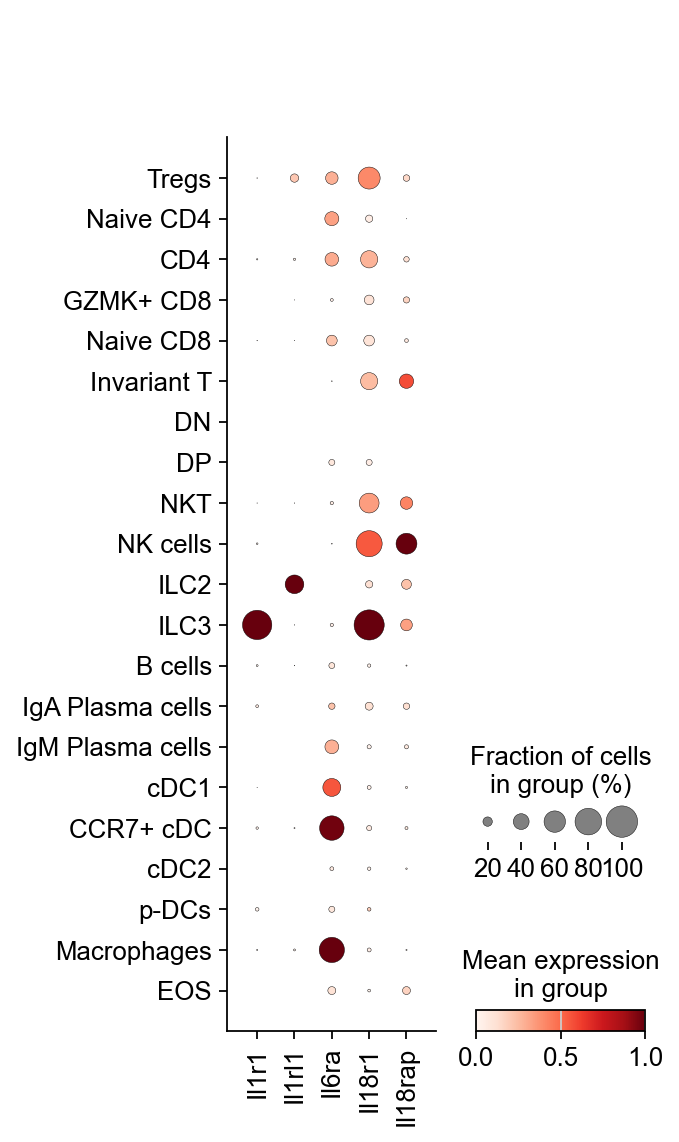

In [146]:
sc.pl.dotplot(young[young.obs["day"]=='d0'], ['Il1r1',"Il1rl1",'Il6ra',"Il18r1","Il18rap" ], ['cell_type_subset',], dendrogram=False,standard_scale='var', swap_axes=False)


/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


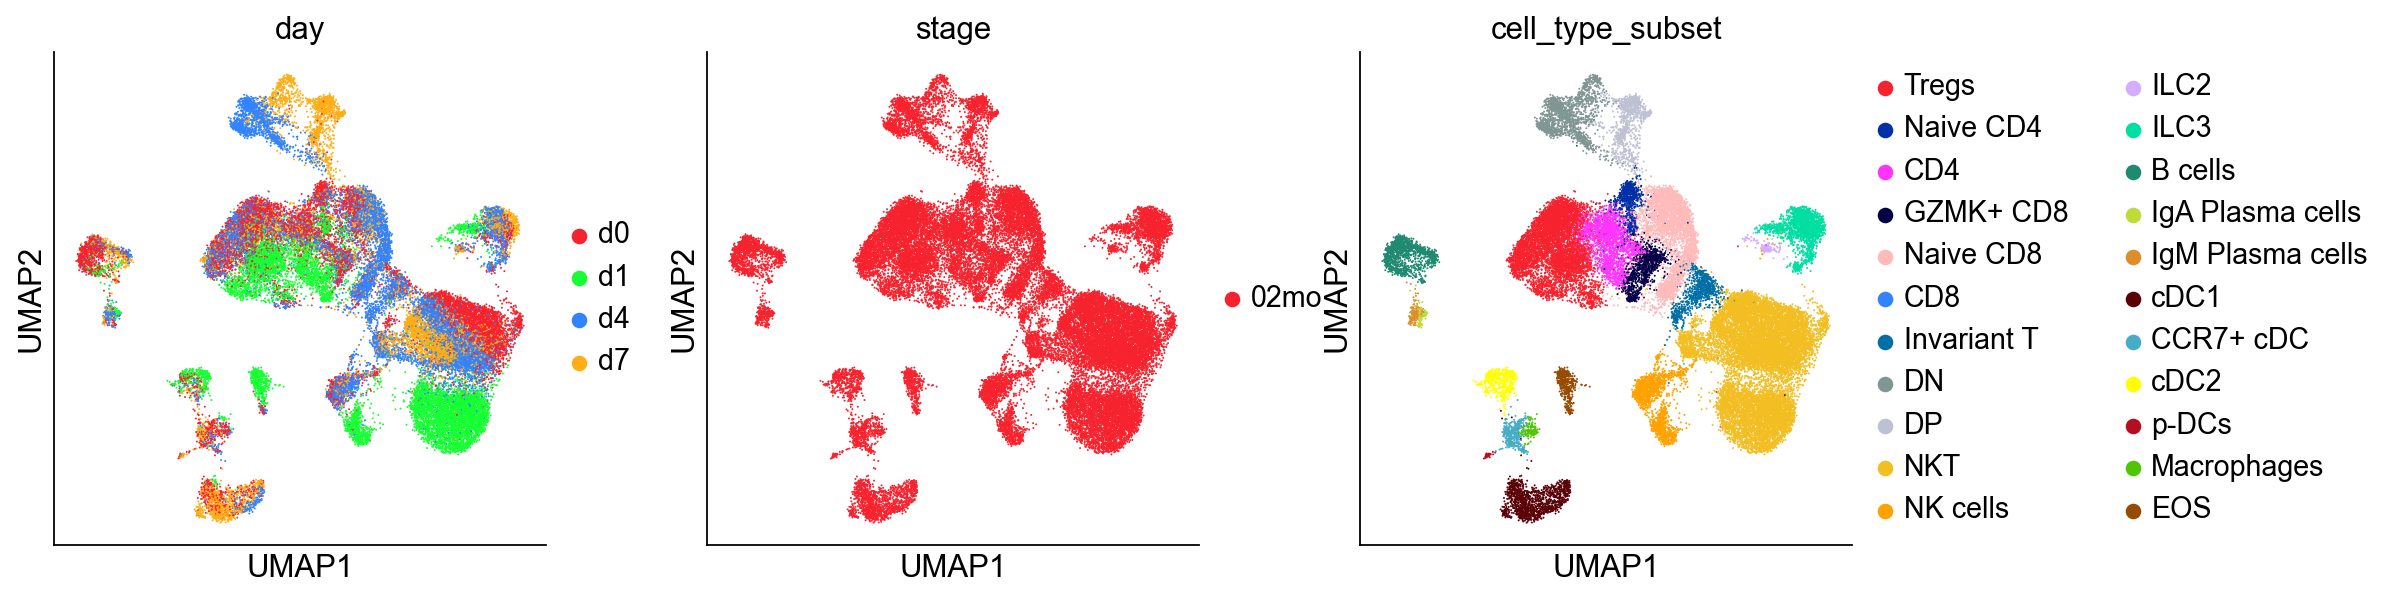

In [156]:
sc.pl.umap(young,color=["day","stage","cell_type_subset",])

In [290]:
young.uns['cell_type_subset_colors']

array(['#f6222e', '#002FA7', '#ff34ff', '#060047', '#ffbaba', '#3283fe',
       '#006fa6', '#809693', '#bec1d4', '#F2BE22', '#FFA200', '#D4ADFC',
       '#00DFA2', '#1F8A70', '#BFDB38', '#DD8D29', '#5a0007', '#46ACC8',
       '#ffff00', '#B40F20', '#4fc601', '#964B00'], dtype=object)

In [149]:
#cell type labels in adata
list(set(adata.obs[obs_key]))

['Naive CD4',
 'cDC1',
 'CD4',
 'p-DCs',
 'DP',
 'Naive CD8',
 'IgA Plasma cells',
 'EOS',
 'cDC2',
 'Macrophages',
 'Tregs',
 'NK cells',
 'B cells',
 'NKT',
 'GZMK+ CD8',
 'ILC3',
 'IgM Plasma cells',
 'DN',
 'CCR7+ cDC',
 'ILC2',
 'Invariant T']

In [185]:
adata = adata[~(adata.obs['cell_type_subset'] == 'CD8')]

ranking genes


/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:582: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:02:20)


/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/tools/_rank_genes_g

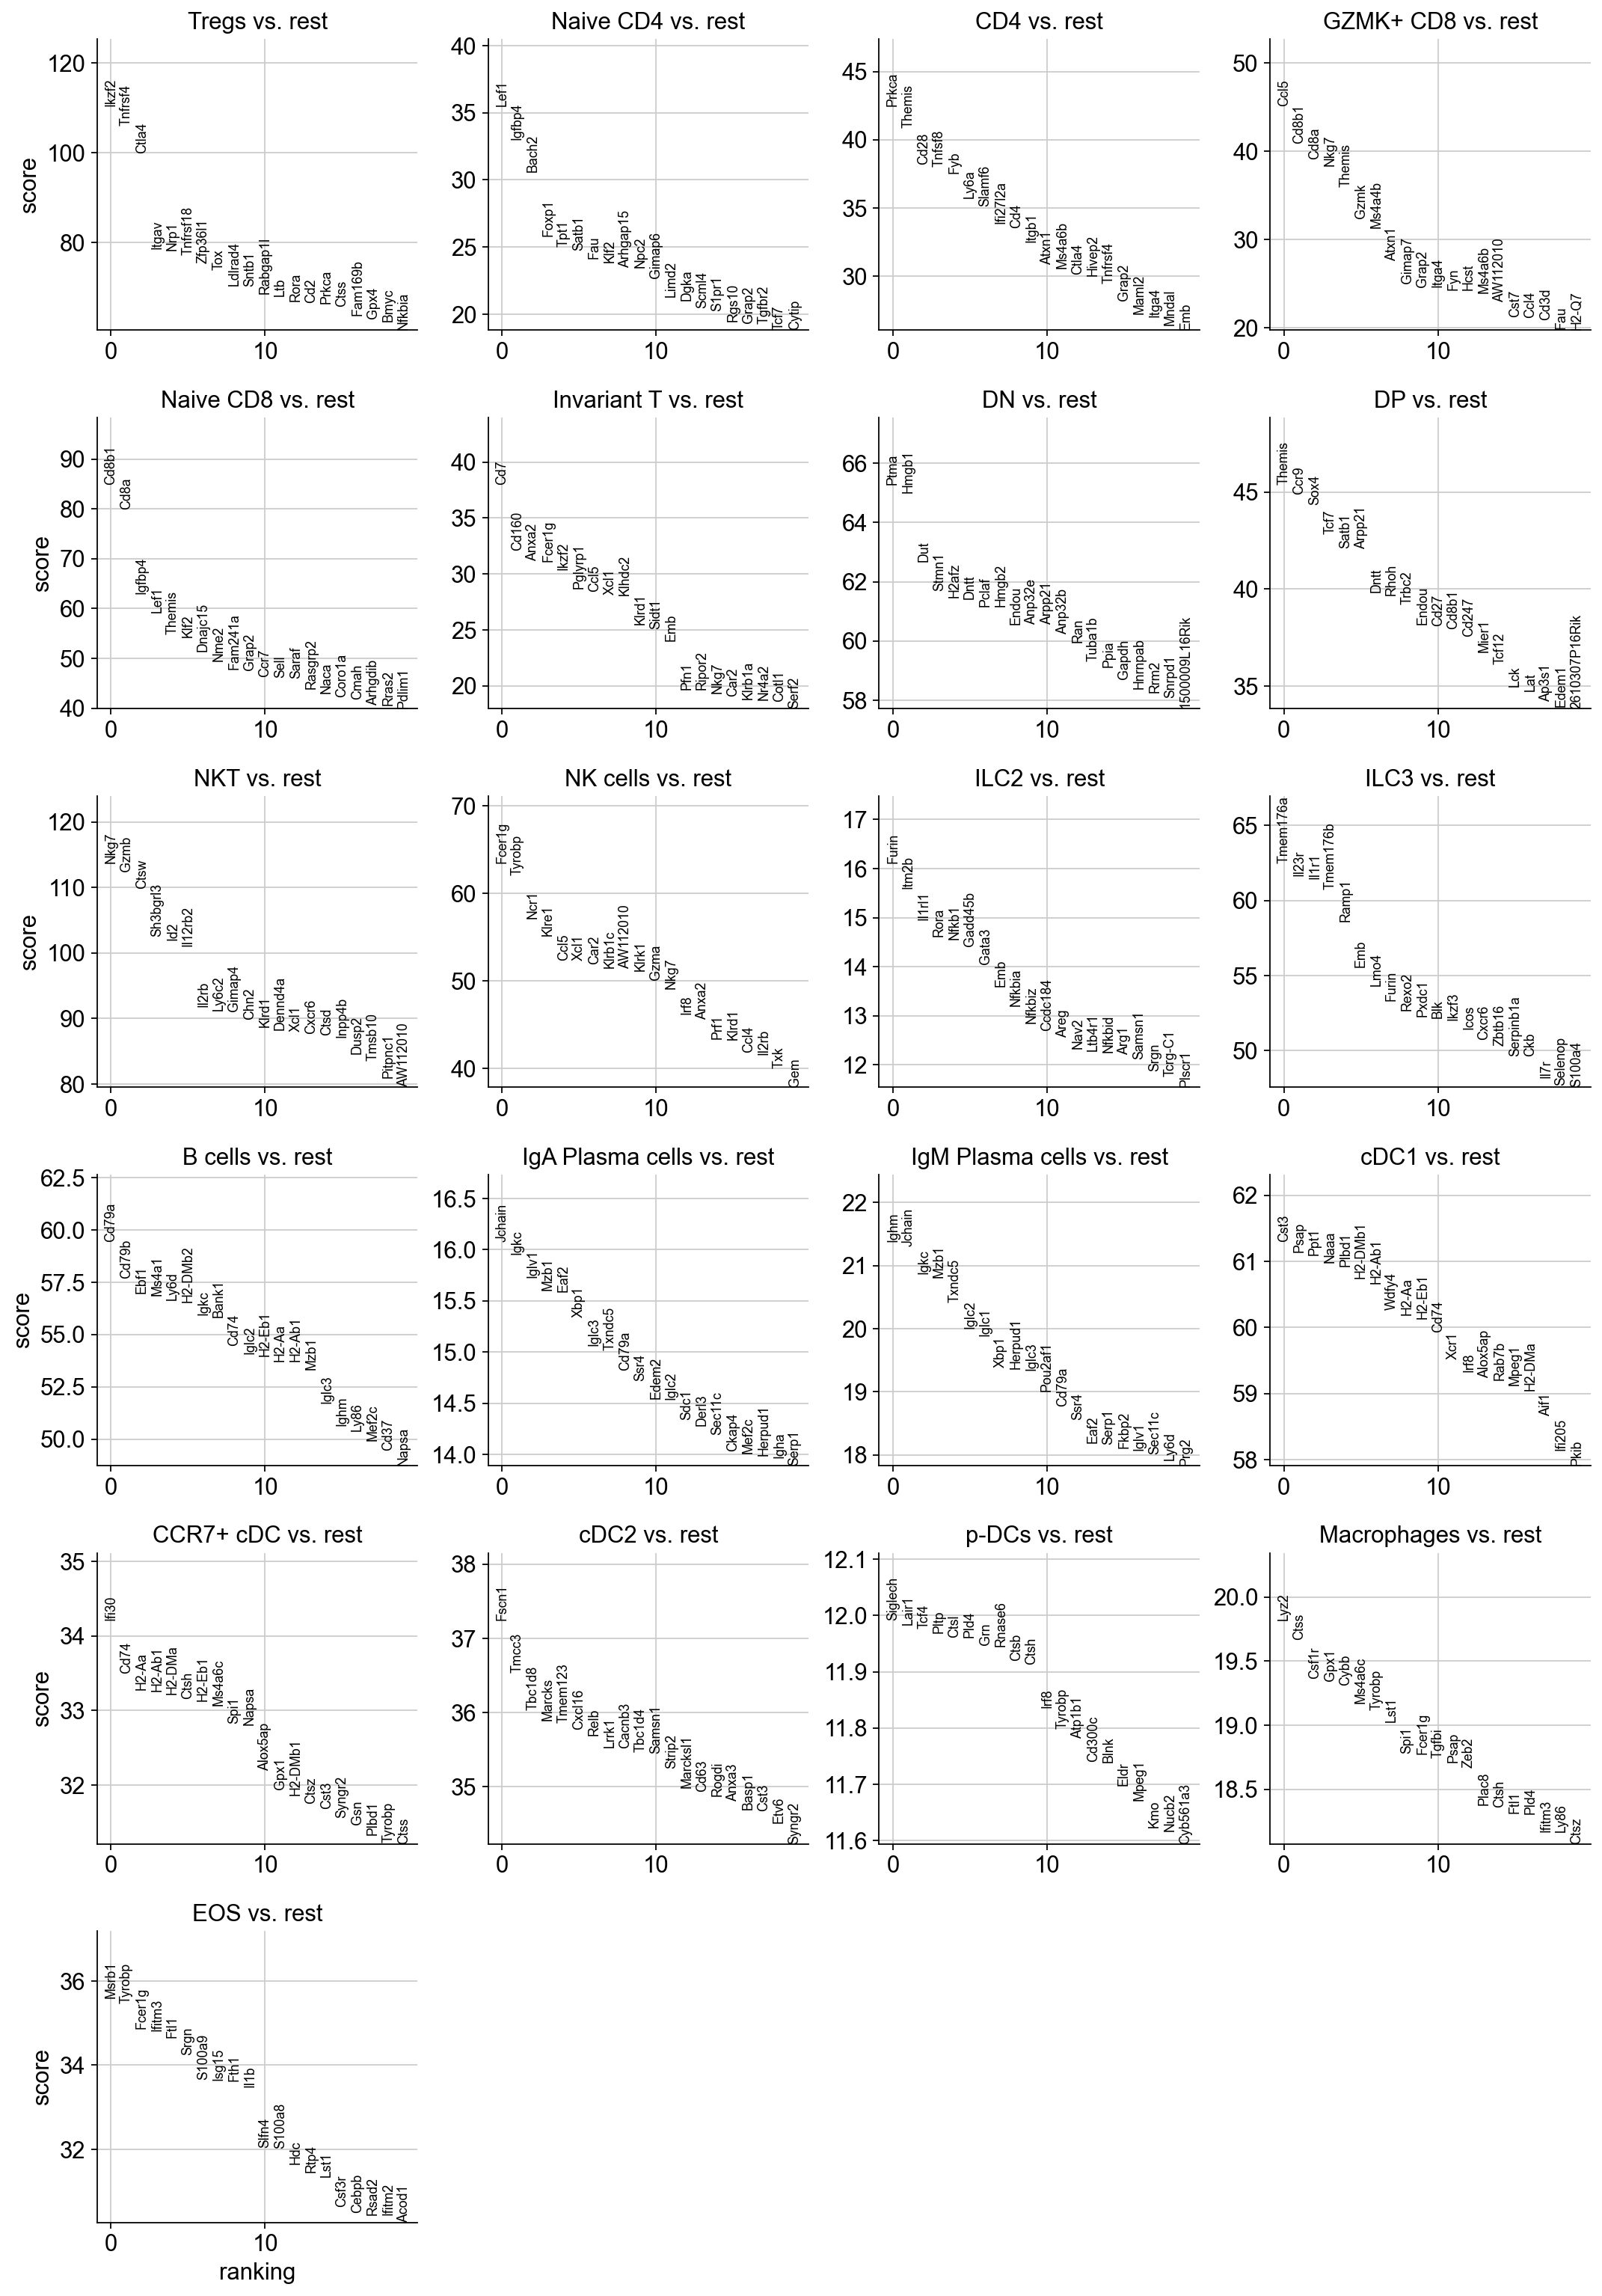

In [173]:
sc.tl.rank_genes_groups(adata, 'cell_type_subset', method='wilcoxon', use_raw=False)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False) 

In [183]:

result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

# Creating a DataFrame with only the first 10 columns
df = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
     for group in groups for key in ['names']})

# Displaying only the first 10 columns
df.iloc[:, 10:21].head(20)

,ILC2_n,ILC3_n,B cells_n,IgA Plasma cells_n,IgM Plasma cells_n,cDC1_n,CCR7+ cDC_n,cDC2_n,p-DCs_n,Macrophages_n,EOS_n
0,Furin,Tmem176a,Cd79a,Jchain,Ighm,Cst3,Ifi30,Fscn1,Siglech,Lyz2,Msrb1
1,Itm2b,Il23r,Cd79b,Igkc,Jchain,Psap,Cd74,Tmcc3,Lair1,Ctss,Tyrobp
2,Il1rl1,Il1r1,Ebf1,Iglv1,Igkc,Ppt1,H2-Aa,Tbc1d8,Tcf4,Csf1r,Fcer1g
3,Rora,Tmem176b,Ms4a1,Mzb1,Mzb1,Naaa,H2-Ab1,Marcks,Pltp,Gpx1,Ifitm3
4,Nfkb1,Ramp1,Ly6d,Eaf2,Txndc5,Plbd1,H2-DMa,Tmem123,Ctsl,Cybb,Ftl1
5,Gadd45b,Emb,H2-DMb2,Xbp1,Iglc2,H2-DMb1,Ctsh,Cxcl16,Pld4,Ms4a6c,Srgn
6,Gata3,Lmo4,Igkc,Iglc3,Iglc1,H2-Ab1,H2-Eb1,Relb,Grn,Tyrobp,S100a9
7,Emb,Furin,Bank1,Txndc5,Xbp1,Wdfy4,Ms4a6c,Lrrk1,Rnase6,Lst1,Isg15
8,Nfkbia,Rexo2,Cd74,Cd79a,Herpud1,H2-Aa,Spi1,Cacnb3,Ctsb,Spi1,Fth1
9,Nfkbiz,Pxdc1,Iglc2,Ssr4,Iglc3,H2-Eb1,Napsa,Tbc1d4,Ctsh,Fcer1g,Il1b


In [184]:
#adata=young

In [217]:
gene_set_annotations = {
"global": {'all_GLU_metabolism':['Slc38a1','Gpt','Slc1a3','Slc7a11','Got2','Aldh18a1','Slc1a1','Slc1a5',
'Slc38a5','Got1','Slc25a13','Slc3a2','Slc25a18','Slc7a6','Slc6a13','Gpt2',
'Slc6a11','Slc7a7','Nags','Slc6a1','Slc1a6','Slc17a7','Slc32a1','Slc25a22',
'Glul','Gls2','Oplah','Acy1','Slc6a12','Slc1a2','Slc17a8','Glud2','Slc38a2',
'Slc38a3','Slc1a7','Gls','Slc25a12','Glud1','Slc38a4','Aldh4a1','Slc17a6'],
'all_fatty-acid_synthesis':['Elovl1','Hacd4','Acaca','Elovl2','Elovl6','Fads3','Hacd1','Tecrl',
'Elovl4','Fads1','Fads6','Fasn','Slc25a1','Fads2','Tecr','Aacs','Mcat',
'Elovl3','Hacd3','Hacd2','Scd5','Acacb','Scd','Elovl7','Hsd17b12','Elovl5'],
'all_NOTCH_signaling':['Heyl','Lfng','Dll1','Jag1','Ccnd1','Fzd1','Aph1a','Cul1','Dtx1','Notch1',
'Kat2a','Dtx2','Fbxw11','Hey1','Maml2','Arrb1','Tcf7l2','Fzd5','Psenen','Wnt5a',
'Hes1','Hey2','Rbx1','St3gal6','Ppard','Notch2','Skp1','Hes5','Psen2','Wnt2',
'Notch3','Sap30','Fzd7','Prkca','Dtx4'],
'global_AGING_GOBP_AGING':['Adra1b','Adra1a','Adra1d','Agtr1a','Agtr1b','Alpl','Comp','Edn1','Ednra','Ercc1','Sec63','Gna11','Gna12','Gna13','Gnaq','Hyal2','Enpp1','Pmp22','Slc1a2','Terc','Trp63','Wrn','Rnf165','Lncpint','Helt','Avpr1b','Nr5a1','Serp1','Ndufs6','Avpr1a','Arhgef12'],
'global_all_MYC_targets':['Nop16','Phb','Gcsh','Nhp2','Ppat','Fasn','Cad','Noc4l','Ncl','Ddx10','Odc1',
                          'Polr2h','Mgst1','Prps2','Adm','Slc39a6','Slc20a1','Shmt1','Tarpb1','Matr3','Psmg1',
                          'Ddx18','Bcat1','Mrto4','Mthfd1','Tsr1','Pno1','Mxi1','Rrp1b','Srm','Rsl1d1','Ak4',
                          'Rcc1','Cdk4','Matr3','Aimp2','Tuba4a','Ppif','Ebnalbp2','Gnl3','Apex1','Iars1',
                          'Ccnd2','Gpd1l','Ldha','Nop56','Fxn','Slpi','Nampt','Pa2g4','Nme1','Ctsc','Nolc1',
                          'Fbl','Uck2','Cebpz','Hspa9','Akap1','Ddx21','Socs3','Mettl1','Trap1','Fkbp4','C1qbp',
                          'Pycr1','Fabp5','Pold2','Tfrc','Paics','Hspd1','Cks2','Ranbp1','Slc19a1','Ndufaf4',
                          'Surf2','Plscr1','Asns','Grwd1','Slc16a1','Ppp1r14b','Hspe1','Ahcy','Emp1','Exosc7'],     
'global_EGF':['Areg',"Tff1", 'Egf', 'Csnk2a1','Egfr', 'Elk1', 'Fos', 'Grb2', 'Hras', 'Jak1', 'Jun','Map2k1', 
              'Map2k4', 'Map3k1', 'Mapk3','Mapk8', 'Pik3ca', 'Pik3r1', 'Plcg1',
'Prkca', 'Prkcb', 'Raf1', 'Rasa1','Shc1', 'Sos1', 'Srf', 'Stat1','Stat3', 'Stat5a'],
'GOBP_ANIMAL_ORGAN_REGENERATION' :['Ace','Gfer','Apoa1','Apoa2','Apoh','Ccnd1','Cdk1','Cebpb','Egfr','Ezh1','Ezh2','Gata1','Gli1','Hmox1','Il6','Itpr1','Lif','Lifr','Pkm','Med1','Reg1','Cxcl5','Cxcl12','Aurka','Tgfb1','Vtn','Wnt1','Upf2','Sulf2'],          
'global_all_glycolysis':['Gapdh','Gck','Pfkfb1','Eno3','Pgk1','Pgm2','Pkm','Pfkp','Eno4','Eno1','Aldoc',
'Eno2','Hk3','Pfkfb2','Pgm5','Tpi1','Aldoa','Aldob','Pklr','Pgk2','Pgm3','Pfkm',
'Pfkl','Hk2','Pgm1','Gpi','Hk1'],
'global_all_glutathione_metabolism':['Gss','Gpx1','Gpx6','Gstm1','Hagh','Gpx4','Gpx5','Prdx3','Esd','Glrx2',
'Gpx2','Prdx1','Glrx','Gpx3','Gclc','Gclm','Gpx7','Ggt1','Adh5','Cth',
'Gpx8','Gsr','Prdx2','Cbs'],
'global_all_IL6-JAK-STAT3_signaling':['Tyk2','Il18r1','Itga4','Csf2ra','Socs1','Cxcl11','Cd14','Ifnar1',
'Ifngr1','Ltb','Map3k8','Ebi3','Il1b','Cbl','Stat1','Pik3r5','Dntt',
'Stat3','Cntfr','Socs3','Reg1a','Tnfrsf12a','Cxcl3','Cd44','Cd38',
'Il4r','Csf2rb','Itgb3','Fas','Hmox1','Irf1','Inhbe','Pf4','Myd88',
'Grb2','Stam2','Acvrl1','Cxcl13','Tnfrsf1a','Ptpn11','Pla2g2a','Tgfb1',
'Ccr1','Cxcl9','Ltbr','Jun','Il3ra','Acvr1b','Osmr','Tnf','Tnfrsf1b',
'Hax1','Bak1','Il15ra','Cxcl1','Il12rb1','Lepr','Csf1','Tnfrsf21',
'Il1r1','Ccl7','Il13ra1','Pim1','Il2ra','Csf2','Il6','Irf9','Cd9',
'Il6st','Stat2','Il1r2','A2m','Cd36','Pdgfc','Tlr2','Crlf2','Il9r',
'Cxcl10','Il2rg','Ifngr2','Il17rb','Il17ra','Ptpn1','Il7','Il10rb'],
'global_all_autophagy-chaperone-mediated':['Eef1a2','Snrnp70','Snca','Eef1a1','Clu','Gfap','Hspa8',
'Hsp90aa1','Bag3','Lamp2','Plk3','Atp13a2','Stub1','Ctsa', 'Synpo2','Atg7'], },

    
'Tregs':{'Tregs':['Ikzf2','Tnfrsf4','Ctla4','Itgav','Nrp1','Tnfrsf18','Zfp36l1','Tox','Ldlrad4','Sntb1','Rabgap1l','Ltb','Rora','Cd2','Prkca','Ctss','Fam169b','Gpx4','Bmyc','Nfkbia' ,],},
'Naive CD4':{"'Naive CD4":['Lef1','Igfbp4','Bach2','Foxp1','Tpt1','Satb1','Fau','Klf2','Arhgap15','Npc2','Gimap6','Limd2','Dgka','Scml4','S1pr1','Rgs10','Grap2','Tgfbr2','Tcf7','Cytip' ,]},
'CD4':{"CD4":[ 'Prkca','Themis','Cd28','Tnfsf8','Fyb','Ly6a','Slamf6','Ifi27l2a','Cd4','Itgb1','Atxn1','Ms4a6b','Ctla4','Hivep2','Tnfrsf4','Grap2','Maml2','Itga4','Mndal','Emb'  ]},
'GZMK+ CD8':{"GZMK+ CD8":['Ccl5','Cd8b1','Cd8a','Nkg7','Themis','Gzmk','Ms4a4b','Atxn1','Gimap7','Grap2','Itga4','Fyn','Hcst','Ms4a6b','AW112010','Cst7','Ccl4','Cd3d','Fau','H2-Q7' ,],},
'Naive CD8':{'Naive CD8':['Cd8b1','Cd8a','Igfbp4','Lef1','Themis','Klf2','Dnajc15','Nme2','Fam241a','Grap2','Ccr7','Sell','Saraf','Rasgrp2','Naca','Coro1a','Cmah','Arhgdib','Rras2','Pdlim1' ,],},
'Invariant T':{'Invariant':['Cd7','Cd160','Anxa2','Fcer1g','Ikzf2','Pglyrp1','Ccl5','Xcl1','Klhdc2','Klrd1','Sidt1','Emb','Pfn1','Ripor2','Nkg7','Car2','Klrb1a','Nr4a2','Cotl1','Serf2' ,],},
'DN':{"DN":['Ptma','Hmgb1','Dut','Stmn1','H2afz','Dntt','Pclaf','Hmgb2','Endou','Anp32e','Arpp21','Anp32b','Ran','Tuba1b','Ppia','Gapdh','Hnrnpab','Rrm2','Snrpd1','1500009L16Rik' ,],},
'DP':{"DP":['Themis','Ccr9','Sox4','Tcf7','Satb1','Arpp21','Dntt','Rhoh','Trbc2','Endou','Cd27','Cd8b1','Cd247','Mier1','Tcf12','Lck','Lat','Ap3s1','Edem1','2610307P16Rik' ],},
'NK cells':{'NK cells':['Fcer1g','Tyrobp','Ncr1','Klre1','Ccl5','Xcl1','Car2','Klrb1c','AW112010','Klrk1','Gzma','Nkg7','Irf8','Anxa2','Prf1','Klrd1','Ccl4','Il2rb','Txk','Gem' ,],},
'NKT':{'NKT':['Nkg7','Gzmb','Ctsw','Sh3bgrl3','Id2','Il12rb2','Il2rb','Ly6c2','Gimap4','Chn2','Klrd1','Dennd4a','Xcl1','Cxcr6','Ctsd','Inpp4b','Dusp2','Tmsb10','Pitpnc1','AW112010' ,],},
'ILC2':{'ILC2':['Furin','Itm2b','Il1rl1','Rora','Nfkb1','Gadd45b','Gata3','Emb','Nfkbia','Nfkbiz','Ccdc184','Areg','Nav2','Ltb4r1','Nfkbid','Arg1','Samsn1','Srgn','Tcrg-C1','Plscr1' ,],},
'ILC3':{'ILC3':['Tmem176a','Il23r','Il1r1','Tmem176b','Ramp1','Emb','Lmo4','Furin','Rexo2','Pxdc1','Blk','Ikzf3','Icos','Cxcr6','Zbtb16','Serpinb1a','Ckb','Il7r','Selenop','S100a4' , ],},
'B cells':{'Bcells':['Cd79a','Cd79b','Ebf1','Ms4a1','Ly6d','H2-DMb2','Igkc','Bank1','Cd74','Iglc2','H2-Eb1','H2-Aa','H2-Ab1','Mzb1','Iglc3','Ighm','Ly86','Mef2c','Cd37','Napsa' ,],},
'cDC1':{'cDC1':['Cst3','Psap','Ppt1','Naaa','Plbd1','H2-DMb1','H2-Ab1','Wdfy4','H2-Aa','H2-Eb1','Cd74','Xcr1','Irf8','Alox5ap','Rab7b','Mpeg1','H2-DMa','Aif1','Ifi205','Pkib' , ],},
'IgM Plasma cells':{'plasmacells':['Ighm','Jchain','Igkc','Mzb1','Txndc5','Iglc2','Iglc1','Xbp1','Herpud1','Iglc3','Pou2af1','Cd79a','Ssr4','Eaf2','Serp1','Fkbp2','Iglv1','Sec11c','Ly6d','Prg2' ,],},
'IgA Plasma cells':{'plasmacells':['Jchain','Igkc','Iglv1','Mzb1','Eaf2','Xbp1','Iglc3','Txndc5','Cd79a','Ssr4','Edem2','Iglc2','Sdc1','Derl3','Sec11c','Ckap4','Mef2c','Herpud1','Igha','Serp1' ,],},
'CCR7+ cDC': {'CCR7+ cDC':['Ifi30','Cd74','H2-Aa','H2-Ab1','H2-DMa','Ctsh','H2-Eb1','Ms4a6c','Spi1','Napsa','Alox5ap','Gpx1','H2-DMb1','Ctsz','Cst3','Syngr2','Gsn','Plbd1','Tyrobp','Ctss' , ],},
'cDC2':{'cDC2':['Fscn1','Tmcc3','Tbc1d8','Marcks','Tmem123','Cxcl16','Relb','Lrrk1','Cacnb3','Tbc1d4','Samsn1','Strip2','Marcksl1','Cd63','Rogdi','Anxa3','Basp1','Cst3','Etv6','Syngr2' ,],},
'p-DCs':{'p-DCs':['Siglech','Lair1','Tcf4','Pltp','Ctsl','Pld4','Grn','Rnase6','Ctsb','Ctsh','Irf8','Tyrobp','Atp1b1','Cd300c','Blnk','Eldr','Mpeg1','Kmo','Nucb2','Cyb561a3' ,]},
'EOS':{'EOS':['Msrb1','Tyrobp','Fcer1g','Ifitm3','Ftl1','Srgn','S100a9','Isg15','Fth1','Il1b','Slfn4','S100a8','Hdc','Rtp4','Lst1','Csf3r','Cebpb','Rsad2','Ifitm2','Acod1' , ],},
'Macrophages':{'Macrophages':['Lyz2','Ctss','Csf1r','Gpx1','Cybb','Ms4a6c','Tyrobp','Lst1','Spi1','Fcer1g','Tgfbi','Psap','Zeb2','Plac8','Ctsh','Ftl1','Pld4','Ifitm3','Ly86','Ctsz' , ],},

}

In [211]:
gene_set_annotations

{'global': {'all_GLU_metabolism': ['Slc38a1',
   'Gpt',
   'Slc1a3',
   'Slc7a11',
   'Got2',
   'Aldh18a1',
   'Slc1a1',
   'Slc1a5',
   'Slc38a5',
   'Got1',
   'Slc25a13',
   'Slc3a2',
   'Slc25a18',
   'Slc7a6',
   'Slc6a13',
   'Gpt2',
   'Slc6a11',
   'Slc7a7',
   'Nags',
   'Slc6a1',
   'Slc1a6',
   'Slc17a7',
   'Slc32a1',
   'Slc25a22',
   'Glul',
   'Gls2',
   'Oplah',
   'Acy1',
   'Slc6a12',
   'Slc1a2',
   'Slc17a8',
   'Glud2',
   'Slc38a2',
   'Slc38a3',
   'Slc1a7',
   'Gls',
   'Slc25a12',
   'Glud1',
   'Slc38a4',
   'Aldh4a1',
   'Slc17a6'],
  'all_fatty-acid_synthesis': ['Elovl1',
   'Hacd4',
   'Acaca',
   'Elovl2',
   'Elovl6',
   'Fads3',
   'Hacd1',
   'Tecrl',
   'Elovl4',
   'Fads1',
   'Fads6',
   'Fasn',
   'Slc25a1',
   'Fads2',
   'Tecr',
   'Aacs',
   'Mcat',
   'Elovl3',
   'Hacd3',
   'Hacd2',
   'Scd5',
   'Acacb',
   'Scd',
   'Elovl7',
   'Hsd17b12',
   'Elovl5'],
  'all_NOTCH_signaling': ['Heyl',
   'Lfng',
   'Dll1',
   'Jag1',
   'Ccnd1',
   'Fzd1

In [212]:
annotations=gene_set_annotations

In [218]:
def check_gene_set_dictionary(adata, annotations, obs_key='cell_type_subset',global_key='global', return_dict = True):
    '''
    Filters annotations dictionary contains only genes contained in the adata. 
    Checks that annotations dictionary cell type keys and adata cell types are identical.
    Checks that all gene sets in annotations dictionary contain >2 genes after filtering.
    
    adata: AnnData , data to use with Spectra
    annotations: dict , gene set annotations dictionary to use with Spectra
    obs_key: str , column name for cell type annotations in adata.obs
    global_key: str , key for global gene sests in gene set annotation dictionary
    return_dict: bool , return filtered gene set annotation dictionary
    
    returns: dict , filtered gene set annotation dictionary
    
    '''
    #test if keys match
    adata_labels  = list(set(adata.obs[obs_key]))+['global']#cell type labels in adata object
    annotation_labels = list(annotations.keys())
    matching_celltype_labels = list(set(adata_labels).intersection(annotation_labels))
    if set(annotation_labels)==set(adata_labels):
        print('Cell type labels in gene set annotation dictionary and AnnData object are identical')
        dict_keys_OK = True
    if len(annotation_labels)<len(adata_labels):
        print('The following labels are missing in the gene set annotation dictionary:',set(adata_labels)-set(annotation_labels))
        dict_keys_OK = False
    if len(adata_labels)<len(annotation_labels):
        print('The following labels are missing in the AnnData object:',set(annotation_labels)-set(adata_labels))
        dict_keys_OK = False
        
    #check that gene sets in dictionary have len >2
    Counter = 0
    annotations_new = {}
    for k,v in annotations.items():
        annotations_new[k] = {}
        for k2,v2 in v.items():
            annotations_new[k][k2]= [x for x in v2 if x in adata.var_names]
            length = len(v2)
            if length<3:
                print('gene set',k2,'for cell type',k,'is of length',length)
                Counter = Counter+1
            
    if Counter > 0:
        print(Counter,'gene sets are too small. Gene sets must contain at least 3 genes')
    elif Counter == 0 and dict_keys_OK:
        print('Your gene set annotation dictionary is correctly formatted.')
    if return_dict:
        return annotations_new

In [219]:
#define data paths
#adata_path = '/Users/xleana/Desktop/Single_cell_course/spectra/data/sample_data.h5ad'#indicate where to find the gene expression AnnData object
obs_key = 'cell_type_subset' #indicat the column name for the dataframe in adata.obs where to find the cell type lab


In [222]:
annotations = check_gene_set_dictionary(adata, annotations, obs_key='cell_type_subset',global_key='global')

Cell type labels in gene set annotation dictionary and AnnData object are identical
Your gene set annotation dictionary is correctly formatted.


In [221]:
annotations = check_gene_set_dictionary(adata, gene_set_annotations, obs_key='cell_type_subset',global_key='global')

Cell type labels in gene set annotation dictionary and AnnData object are identical
Your gene set annotation dictionary is correctly formatted.


In [225]:
sc.pp.highly_variable_genes(adata, n_top_genes=4000, n_bins=20, flavor='seurat_v3')

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes


/Users/xleana/anaconda3/envs/scRNAseq_2024/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)


In [226]:
#fit the model (We will run this with only 2 epochs to decrease runtime in this tutorial)
model = spc.est_spectra(adata = adata, gene_set_dictionary = gene_set_annotations, 
                        use_highly_variable = True, cell_type_key = 'cell_type_subset', 
                        use_weights = True, lam = 0.1, 
                        delta=0.001,kappa = 0.00001, rho = 0.00001, 
                        use_cell_types = True, n_top_vals = 25, 
                        label_factors = True, #whether to label the factors by their overlap coefficient with the input gene sets
                        overlap_threshold = 0.2, #minimum overlap coefficient that has to be surpassed to assign a label to a factor
                        num_epochs=10000 #for demonstration purposes we will only run 2 epochs, we recommend 10,000 epochs
                       )

Cell type labels in gene set annotation dictionary and AnnData object are identical
Your gene set annotation dictionary is now correctly formatted.


100%|██████████████████████████████████| 10000/10000 [66:41:31<00:00, 24.01s/it]


In [283]:
adata.uns['SPECTRA_overlap'] 

,all_GLU_metabolism,all_fatty-acid_synthesis,all_NOTCH_signaling,global_AGING_GOBP_AGING,global_all_MYC_targets,global_EGF,GOBP_ANIMAL_ORGAN_REGENERATION,global_all_glycolysis,global_all_glutathione_metabolism,global_all_IL6-JAK-STAT3_signaling,...,ILC2,ILC3,Bcells,cDC1,plasmacells,CCR7+ cDC,cDC2,p-DCs,EOS,Macrophages
0-X-global-X-all_GLU_metabolism,1.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1-X-global-X-all_fatty-acid_synthesis,0.00,0.826087,0.00,0.00,0.04,0.00,0.00,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2-X-global-X-NKT,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3-X-global-X-global_AGING_GOBP_AGING,0.00,0.000000,0.00,0.76,0.04,0.00,0.00,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00
4-X-global-X-global_all_MYC_targets,0.00,0.000000,0.00,0.00,0.92,0.00,0.00,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5-X-global-X-5,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.15,0.00
6-X-global-X-6,0.00,0.000000,0.00,0.00,0.00,0.00,0.08,0.000000,0.000000,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7-X-global-X-GZMK+ CD8,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,...,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8-X-global-X-8,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.045455,0.00,...,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9-X-global-X-ILC2,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.16,...,0.25,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00


In [284]:
path_to_h5ad = '/Users/xleana/Desktop/Manuscript_Tregs/spectra.h5ad'
adata.write(path_to_h5ad)

plotting factor: 46-X-Tregs-X-Tregs


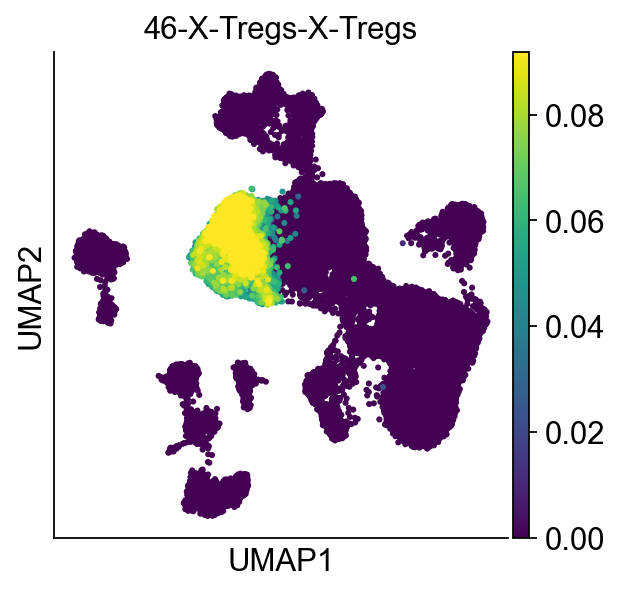

In [233]:
#visualize factor cell scores (this is poorly fitted bc we only ran 2 epochs)
factor_of_interest = adata.uns['SPECTRA_overlap'].index[46]
print('plotting factor:',adata.uns['SPECTRA_overlap'].index[46])

#add cell scores to obs
cell_scores = adata.obsm['SPECTRA_cell_scores'][:,46].astype(float)
adata.obs[factor_of_interest] = cell_scores
sc.pl.umap(adata,color=factor_of_interest,s=30,vmax=np.quantile(cell_scores,0.98))

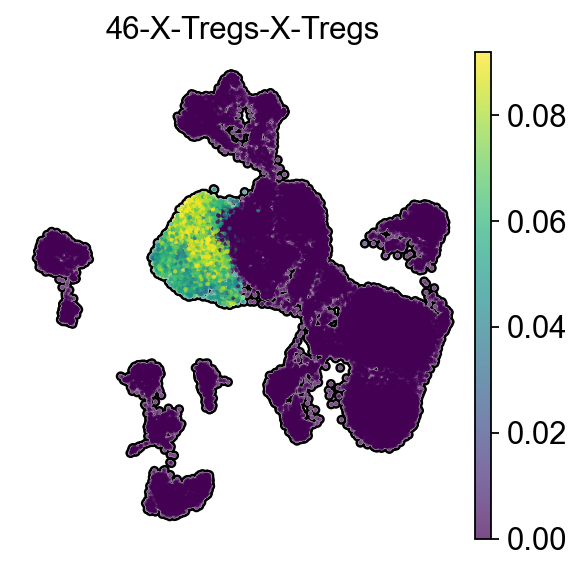

In [234]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata, 
    color=factor_of_interest, 
    use_raw=False,
    ncols=5,
    wspace = 0.1,
    outline_width=[0.6, 0.05],
    size=15,
    frameon=False,
    add_outline=True,
    sort_order = False,
    vmax=np.quantile(cell_scores,0.98)
)

plotting factor: 47-X-Tregs-X-47


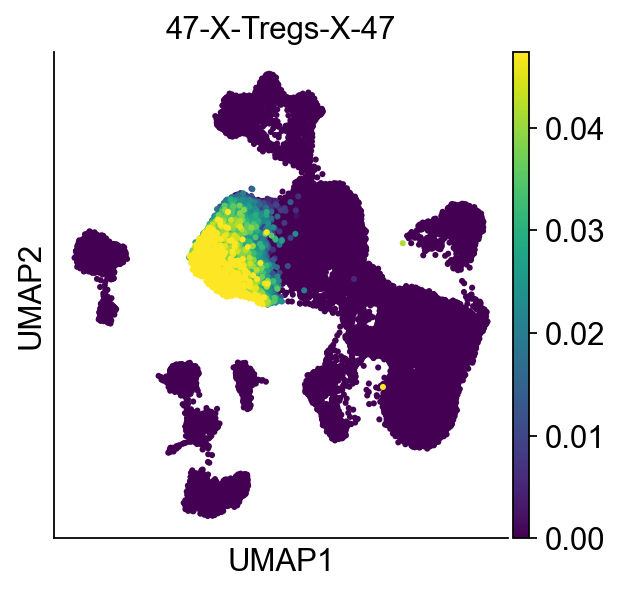

In [235]:
#visualize factor cell scores (this is poorly fitted bc we only ran 2 epochs)
factor_of_interest = adata.uns['SPECTRA_overlap'].index[47]
print('plotting factor:',adata.uns['SPECTRA_overlap'].index[47])

#add cell scores to obs
cell_scores = adata.obsm['SPECTRA_cell_scores'][:,47].astype(float)
adata.obs[factor_of_interest] = cell_scores
sc.pl.umap(adata,color=factor_of_interest,s=30,vmax=np.quantile(cell_scores,0.98))

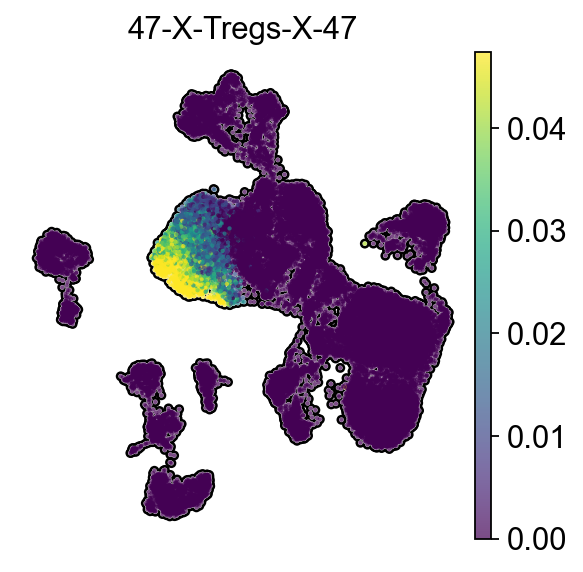

In [236]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=False, transparent=True)
sc.pl.umap(
    adata, 
    color=factor_of_interest, 
    use_raw=False,
    ncols=5,
    wspace = 0.1,
    outline_width=[0.6, 0.05],
    size=15,
    frameon=False,
    add_outline=True,
    sort_order = False,
    vmax=np.quantile(cell_scores,0.98)
)

In [237]:
#so you can construct a dataframe for the factor gene weights

#include cell type specificity as a prefix into the index
index_labels = adata.uns['SPECTRA_overlap'].index
gene_weights = pd.DataFrame(adata.uns['SPECTRA_factors'], 
                            index= index_labels,
                            columns=adata.var[adata.var['spectra_vocab']].index)
gene_weights

,Rgs20,Cpa6,A830018L16Rik,Slco5a1,Eya1,4930444P10Rik,Gdap1,Tfap2d,Il17a,Il17f,...,Arhgap6,Eif2s3y,Uty,Usp9y,AC125149.3,AC132444.6,Spry3,Tmlhe,4933409K07Rik,AC149090.1
0-X-global-X-all_GLU_metabolism,4.462091e-16,1.935314e-15,6.595782e-16,1.402545e-14,5.734881e-15,9.015646e-15,4.887063e-16,1.333049e-15,3.380029e-17,1.311551e-14,...,8.563333e-15,5.069626e-16,5.114445e-16,5.096794e-16,2.384244e-15,4.976399e-16,4.043474e-16,3.431274e-14,4.702791e-16,7.190416e-10
1-X-global-X-all_fatty-acid_synthesis,5.129012e-16,2.346353e-15,8.178422e-16,1.596809e-14,5.949370e-15,1.034035e-14,4.724775e-16,1.844332e-15,2.014592e-17,1.298857e-14,...,9.638634e-15,5.780823e-16,5.780081e-16,5.695218e-16,2.840041e-15,5.694121e-16,5.631235e-16,1.687199e-14,5.702459e-16,3.258546e-11
2-X-global-X-NKT,5.014261e-16,1.953568e-15,9.011015e-16,1.782521e-14,6.812574e-15,9.121606e-15,5.540526e-16,1.930095e-15,1.447530e-16,1.327563e-14,...,1.159713e-14,5.281390e-16,5.745863e-16,5.040365e-16,2.146488e-15,4.225277e-16,4.832717e-16,1.330930e-14,5.715591e-16,1.972615e-04
3-X-global-X-global_AGING_GOBP_AGING,4.678229e-16,2.217435e-15,7.679327e-16,1.507429e-14,6.583016e-15,1.007386e-14,4.559964e-16,1.883074e-15,6.809560e-17,1.393088e-14,...,1.101907e-14,5.312162e-16,5.644506e-16,5.596441e-16,2.927635e-15,5.244469e-16,5.378868e-16,2.743299e-14,5.649100e-16,4.674462e-09
4-X-global-X-global_all_MYC_targets,2.768668e-16,1.290979e-15,4.818614e-16,9.323950e-15,3.500638e-15,5.176006e-15,2.349463e-16,1.096892e-15,6.080763e-17,6.098174e-15,...,7.531314e-15,3.096129e-16,3.214272e-16,2.974930e-16,1.493534e-15,2.942919e-16,2.643967e-16,7.922719e-15,3.118759e-16,3.723120e-12
5-X-global-X-5,5.753332e-16,2.001789e-15,1.816955e-15,3.407250e-14,7.146737e-15,1.084874e-14,3.808460e-16,1.954765e-15,5.235879e-08,2.113298e-14,...,9.211474e-14,4.953265e-16,6.217288e-16,5.882048e-16,2.907424e-15,4.567341e-16,5.023698e-16,6.385857e-15,5.045281e-16,2.267514e-04
6-X-global-X-6,4.742674e-16,2.149241e-15,8.847942e-16,1.260845e-14,4.379099e-15,1.016561e-14,5.735655e-16,1.990801e-15,3.971345e-17,2.309412e-14,...,8.949989e-15,5.718402e-16,5.689547e-16,5.199371e-16,2.747862e-15,6.016588e-16,5.916823e-16,1.928603e-14,5.538315e-16,1.334947e-11
7-X-global-X-GZMK+ CD8,6.487290e-16,3.928960e-15,2.538579e-15,1.602976e-14,7.247343e-15,1.225453e-14,5.427696e-16,1.881052e-15,1.060505e-05,2.234469e-14,...,4.193969e-14,4.475705e-16,4.492946e-16,5.888391e-16,1.942648e-15,5.097775e-16,3.650188e-16,4.870923e-13,5.531632e-16,1.153047e-06
8-X-global-X-8,5.722328e-16,2.672769e-15,1.133166e-15,1.340822e-14,5.648081e-15,1.144763e-14,5.143605e-16,1.980416e-15,4.134918e-05,3.119710e-14,...,4.651057e-14,2.921343e-16,5.778075e-16,4.985407e-16,3.494736e-15,5.102785e-16,4.933517e-16,1.311108e-14,4.761367e-16,1.268257e-06
9-X-global-X-ILC2,3.257650e-16,1.488937e-15,4.910552e-16,9.979927e-15,3.916843e-15,5.611079e-15,3.595901e-16,1.178305e-15,2.924234e-17,9.005541e-15,...,6.927038e-15,3.700778e-16,3.782588e-16,3.076556e-16,1.383817e-15,3.504816e-16,3.651651e-16,1.623127e-14,3.504931e-16,2.355887e-07


In [238]:
gene_weightsT=gene_weights.T

In [239]:
gene_weightsT

,0-X-global-X-all_GLU_metabolism,1-X-global-X-all_fatty-acid_synthesis,2-X-global-X-NKT,3-X-global-X-global_AGING_GOBP_AGING,4-X-global-X-global_all_MYC_targets,5-X-global-X-5,6-X-global-X-6,7-X-global-X-GZMK+ CD8,8-X-global-X-8,9-X-global-X-ILC2,...,44-X-Naive CD8-X-GZMK+ CD8,45-X-Naive CD8-X-45,46-X-Tregs-X-Tregs,47-X-Tregs-X-47,48-X-cDC1-X-cDC1,49-X-cDC1-X-49,50-X-cDC2-X-cDC2,51-X-cDC2-X-51,52-X-p-DCs-X-p-DCs,53-X-p-DCs-X-53
Rgs20,4.462091e-16,5.129012e-16,5.014261e-16,4.678229e-16,2.768668e-16,5.753332e-16,4.742674e-16,6.487290e-16,5.722328e-16,3.257650e-16,...,1.138544e-14,0.004575,5.702725e-15,0.002170,5.705734e-14,0.003182,1.161178e-13,0.005472,1.330060e-14,0.000950
Cpa6,1.935314e-15,2.346353e-15,1.953568e-15,2.217435e-15,1.290979e-15,2.001789e-15,2.149241e-15,3.928960e-15,2.672769e-15,1.488937e-15,...,2.254601e-15,0.000914,1.095086e-14,0.004101,5.110003e-15,0.000913,9.596907e-15,0.000912,1.017648e-14,0.000912
A830018L16Rik,6.595782e-16,8.178422e-16,9.011015e-16,7.679327e-16,4.818614e-16,1.816955e-15,8.847942e-16,2.538579e-15,1.133166e-15,4.910552e-16,...,1.117253e-14,0.002522,1.383124e-14,0.007567,1.630421e-15,0.000941,1.519949e-14,0.000942,4.084074e-15,0.000941
Slco5a1,1.402545e-14,1.596809e-14,1.782521e-14,1.507429e-14,9.323950e-15,3.407250e-14,1.260845e-14,1.602976e-14,1.340822e-14,9.979927e-15,...,1.624843e-16,0.000437,1.863323e-13,0.004788,3.406057e-15,0.000590,5.344298e-02,0.383763,4.923029e-14,0.004790
Eya1,5.734881e-15,5.949370e-15,6.812574e-15,6.583016e-15,3.500638e-15,7.146737e-15,4.379099e-15,7.247343e-15,5.648081e-15,3.916843e-15,...,1.492256e-15,0.000527,2.282764e-15,0.000545,6.339299e-15,0.000573,2.919248e-13,0.005729,8.433588e-13,0.135603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC132444.6,4.976399e-16,5.694121e-16,4.225277e-16,5.244469e-16,2.942919e-16,4.567341e-16,6.016588e-16,5.097775e-16,5.102785e-16,3.504816e-16,...,1.239049e-15,0.000975,3.024152e-15,0.000975,4.737609e-15,0.000975,1.547734e-14,0.000975,2.712425e-14,0.000975
Spry3,4.043474e-16,5.631235e-16,4.832717e-16,5.378868e-16,2.643967e-16,5.023698e-16,5.916823e-16,3.650188e-16,4.933517e-16,3.651651e-16,...,2.694954e-15,0.000971,1.432308e-15,0.000971,3.383809e-15,0.000971,1.359946e-14,0.000971,7.271634e-15,0.000971
Tmlhe,3.431274e-14,1.687199e-14,1.330930e-14,2.743299e-14,7.922719e-15,6.385857e-15,1.928603e-14,4.870923e-13,1.311108e-14,1.623127e-14,...,9.438452e-03,0.000062,6.549798e-03,0.026483,6.193625e-16,0.000350,2.190035e-14,0.000519,5.195466e-14,0.007722
4933409K07Rik,4.702791e-16,5.702459e-16,5.715591e-16,5.649100e-16,3.118759e-16,5.045281e-16,5.538315e-16,5.531632e-16,4.761367e-16,3.504931e-16,...,2.867682e-15,0.000974,3.503823e-15,0.000974,6.640783e-15,0.000974,1.610281e-14,0.000974,3.704995e-15,0.000974


In [240]:

gene_weightsT.to_csv('/Users/xleana/Desktop/Manuscript_Tregs/Rebuttal/Spectra.csv')

In [242]:
gene_weightsT[['46-X-Tregs-X-Tregs']].sort_values(by = '46-X-Tregs-X-Tregs', ascending = False)[:100].index

Index(['Tnfrsf4', 'Ikzf2', 'Izumo1r', 'Ctla4', 'Nrp1', 'Lrrc32', 'Foxp3',
       'Rora', 'Ikzf4', 'Ifi27l2a', 'Sntb1', 'Lrig1', 'Cd3d', 'Cd2', 'Trac',
       'Cd3g', 'Trbc2', 'Tshz2', 'Tnfrsf18', 'Tox', 'Tnfsf8', 'Bmyc', 'Itgav',
       'Ms4a4b', 'Prkca', 'Il18r1', 'Malat1', 'Ltb', 'Chchd10', 'Shisa5',
       'Fau', 'Cd3e', 'Adamts6', 'Cd5', 'Fam169b', 'Inpp4b', 'Il1r2', 'Gimap3',
       'Gpx4', 'H2-K1', 'Cd52', 'Tpt1', 'Eef1a1', 'St6galnac3', 'Rgs2', 'Ecm1',
       'Twist2', 'Cd81', 'Fth1', 'Hopx', 'Ctss', 'Pfn1', 'Rgs10', 'Tnfrsf9',
       'Ms4a6b', 'Trbc1', 'Lck', 'Ppia', 'Ptger2', 'Skap1', 'Il2ra',
       'AW112010', 'Hdac9', 'Penk', 'Plagl1', 'S100a10', 'Tmsb10', 'Tspan32',
       'H2afz', 'Ccr7', 'March3', 'Prickle1', 'Rgs16', 'Capg', 'Sh2d1a',
       'Naca', 'Jund', 'Junb', 'A630091E08Rik', '2310001H17Rik', 'Rabgap1l',
       'Itgb8', 'Tspan3', 'Btg1', 'Mctp1', 'Phlpp1', 'Limd2', 'Ldlrad4',
       'Cish', 'Nfkbia', 'Ccr6', 'Zfp36l1', 'Ptma', 'Emb', 'Ccnd2', 'Itm2b',
       'Coro

In [243]:
gene_weightsT[['47-X-Tregs-X-47']].sort_values(by = '47-X-Tregs-X-47', ascending = False)[:100].index



Index(['Il1rl1', 'Ncmap', 'Tff1', 'Sdcbp2', 'Frmd5', 'Klrg1', 'Tnfrsf8',
       'Areg', 'Foxp3', 'Neb', 'Itgb8', 'Apol9b', 'Laptm4b', 'Ttc39c', 'Ccr4',
       'Ebi3', 'Dst', 'Cd200r1', 'Fam110a', 'Penk', 'Cpm', 'Rad51b', 'Chst2',
       'Rln3', 'Lamc1', 'Il2ra', 'F730043M19Rik', 'Cep112', 'Arl5a', 'Bcl2l1',
       'Acsbg1', 'Dkk3', 'Cpd', 'Myo3b', 'Ednrb', 'Ankrd6', 'Sdc4', 'Mir155hg',
       'Egln3', 'Lclat1', 'Ccr6', 'Axl', 'Sytl2', 'Il1r2', 'Stab1', 'Tox2',
       'Hacd3', 'Atp2b4', 'Stx11', 'Maf', 'Nav2', 'Ky', 'Fabp5', 'Hivep3',
       'Bcl2l15', 'Socs2', 'Cd4', 'Plcb4', 'Ctla2a', 'A430093F15Rik', 'Gimap7',
       'Tnfrsf25', 'Phc3', 'Igsf9b', 'Gadd45b', 'Zdhhc2', 'Psen2', 'Flnb',
       'Slc24a3', 'Sv2c', 'H1f0', 'Src', 'Hopx', 'Apol9a', 'Bicd1', 'Abcb1a',
       'Gpr160', 'Igflr1', 'E230029C05Rik', 'N4bp1', 'Rab11fip1', 'Arhgef12',
       'Igtp', 'Slc15a3', 'Pacs1', 'Il9r', 'Wls', 'Glrx', 'Pglyrp1', 'Eea1',
       'Klf12', 'Cish', 'Morrbid', 'Gbp3', 'Pdcd1', 'S100a4', 'Cd5', 'Rr

In [244]:
import magic

In [245]:
magic_op = magic.MAGIC()

In [246]:
magic_op.set_params(knn=5, t=4)

MAGIC(knn_max=15, t=4)

In [247]:
adataT=adata[adata.obs["cell_type"]=="T cells"]

In [258]:
adataCD4_magic = magic_op.fit_transform(adata, genes=gene_weightsT[['46-X-Tregs-X-Tregs']].sort_values(by = '46-X-Tregs-X-Tregs', ascending = False)[:200].index)

Calculating MAGIC...
  Running MAGIC on 38083 cells and 18532 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 36.09 seconds.
    Calculating KNN search...
    Calculated KNN search in 266.13 seconds.
    Calculating affinities...
    Calculated affinities in 270.14 seconds.
  Calculated graph and diffusion operator in 572.46 seconds.
  Calculating imputation...
  Calculated imputation in 0.91 seconds.
Calculated MAGIC in 575.44 seconds.


In [259]:
adataCD4_magic

AnnData object with n_obs × n_vars = 38083 × 200
    obs: 'sample', 'stage', 'day', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'original_total_counts', 'log10_original_total_counts', 'mito_frac', 'ribo_frac', 'hb_frac', 'doublet_score', 'predicted_doublet', 'n_counts', 'leiden_0.6', 'leiden_0.8', 'leiden_1.0', 'leiden_1.2', 'keep_cell', 'leiden_0.1', 'leiden_0.2', 'leiden_0.3', 'leiden_0.4', 'leiden_0.5', 'leiden_0.7', 'leiden_0.9', 'leiden_1.1', 'leiden_1.3', 'leiden_1.4', 'leiden_1.5', 'cell_type', 'cell_type_subset', '44-X-Naive CD8-X-GZMK+ CD8', '46-X-Tregs-X-Tregs', '47-X-Tregs-X-47'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'ribo', 'hb', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_no

In [260]:
adataCD4_magic.uns["cell_type_subset_colors"]=adata.uns["cell_type_subset_colors"]

In [261]:
import scvelo as scv
scv.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True, format='pdf')

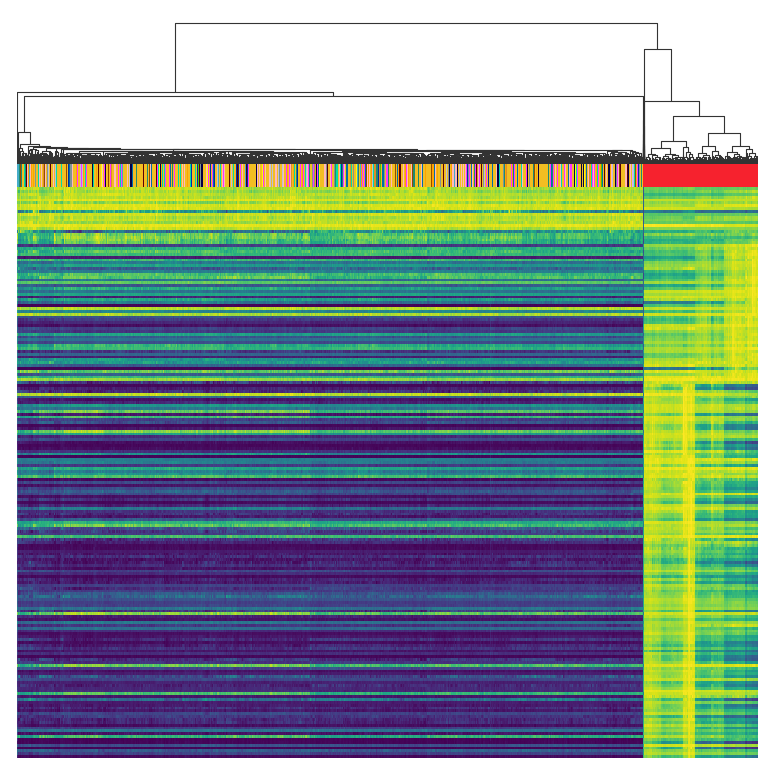

In [262]:
scv.pl.heatmap(adataCD4_magic, var_names=gene_weightsT[['46-X-Tregs-X-Tregs']].sort_values(by = '46-X-Tregs-X-Tregs', ascending = False)[:200].index,
               sortby='46-X-Tregs-X-Tregs', color_map='viridis', col_color=['cell_type_subset'], col_cluster= ['cell_type_subset'],             
               n_convolve=100, figsize=(5,5),yticklabels=False) #save='46-X-Tregs-X-Tregs_viridis.pdf')

In [285]:
adataCD4_magic = magic_op.fit_transform(adata, genes=gene_weightsT[['47-X-Tregs-X-47']].sort_values(by = '47-X-Tregs-X-47', ascending = False)[:200].index)

Calculating MAGIC...
  Running MAGIC on 38083 cells and 18532 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 36.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 279.99 seconds.
    Calculating affinities...
    Calculated affinities in 277.84 seconds.
  Calculated graph and diffusion operator in 594.54 seconds.
  Calculating imputation...
  Calculated imputation in 0.81 seconds.
Calculated MAGIC in 597.08 seconds.


In [286]:
adataCD4_magic.uns["cell_type_subset_colors"] = adata.uns["cell_type_subset_colors"]

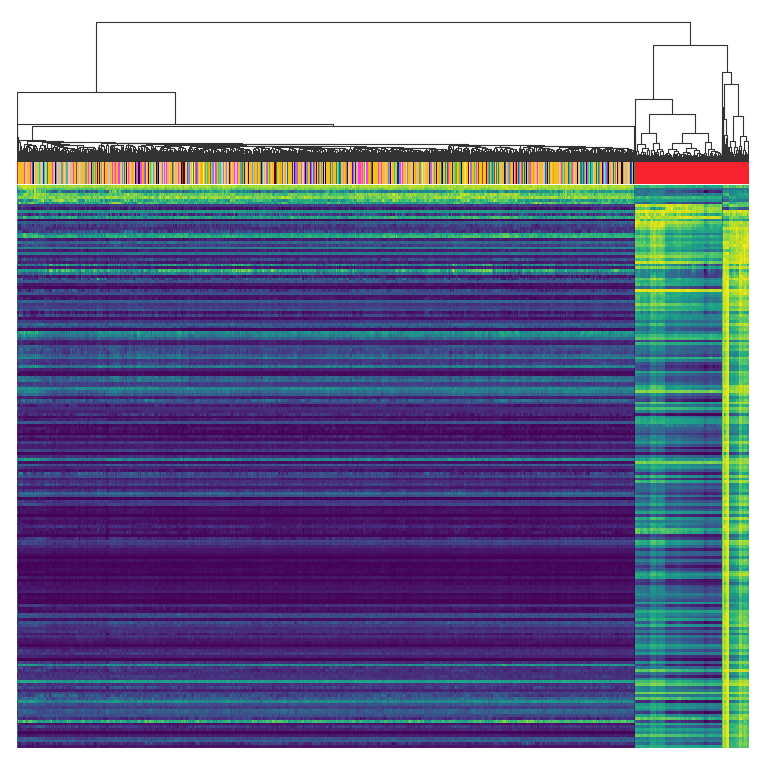

In [287]:
scv.pl.heatmap(adataCD4_magic, var_names=gene_weightsT[['47-X-Tregs-X-47']].sort_values(by = '47-X-Tregs-X-47', 
               ascending = False)[:200].index,sortby='47-X-Tregs-X-47', color_map='viridis', col_color=['cell_type_subset'], 
               col_cluster= ['cell_type_subset'],n_convolve=100, figsize=(5,5),yticklabels=False) #save='46-X-Tregs-X-Tregs_viridis.pdf')

In [275]:
Treggenes= {'Treg activation': ['Foxp3','Il2ra', 'Cd81','Tnfrsf4',  'Ctla4','Ikzf2','Ikzf4','Rora', 'Tnfrsf18']}
Regeneration= { 'Regeneration': [ 'Areg', 'Tff1','Penk',]}
Cellstability= {'Stability': ['Zfp36l1','Cish','Sdc4',"Klrg1"]}

In [270]:
Tregs= adata[adata.obs["cell_type_subset"]=='Tregs']

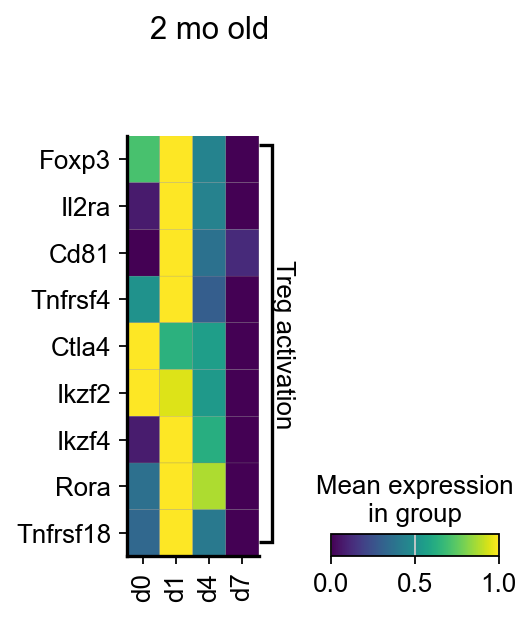

In [291]:
sc.pl.matrixplot(Tregs[Tregs.obs['stage']=="02mo"],Treggenes , 'day', dendrogram=False,  standard_scale='var', swap_axes=True,title="2 mo old")


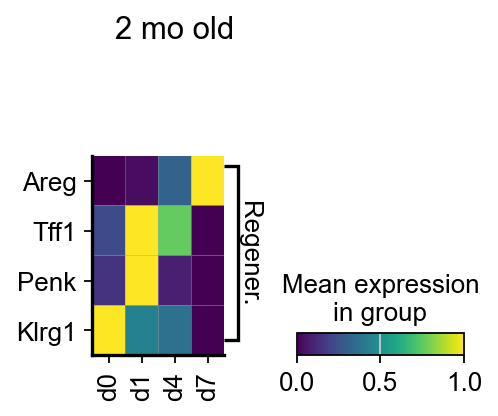

In [282]:
sc.pl.matrixplot(Tregs[Tregs.obs['stage']=="02mo"], Regeneration , 'day', dendrogram=False,  standard_scale='var', swap_axes=True,title="2 mo old")


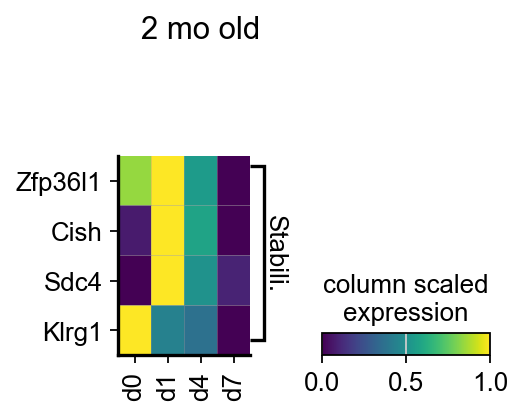

In [281]:
sc.pl.matrixplot(Tregs[Tregs.obs['stage']=="02mo"], Cellstability , 'day', dendrogram=False,  standard_scale='var', swap_axes=True,title="2 mo old",colorbar_title='column scaled\nexpression',)
